In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')
import os
%matplotlib inline
!pip install missingno
import missingno as msno
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
!pip install optuna
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
!pip install catboost
import catboost
from catboost import CatBoostClassifier
!pip install lightgbm
import lightgbm as lgbm
from lightgbm import LGBMClassifier
optuna.logging.set_verbosity(optuna.logging.WARNING)
from lightgbm import *
pd.set_option("display.max_columns", None)

In [93]:
data = pd.read_csv('merged_data.csv')

In [94]:
data.head()

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


In [95]:
data.describe()

,X,Y,Z,EDA,HR,TEMP,label
count,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07
mean,-2.823775e+01,-9.091032e-01,2.382449e+01,3.502127e+00,8.576090e+01,3.223435e+01,1.554202e+00
std,3.142310e+01,3.343382e+01,2.985317e+01,5.656541e+00,1.419642e+01,2.260516e+00,7.891827e-01
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00,5.100000e+01,2.409000e+01,0.000000e+00
25%,-5.200000e+01,-1.900000e+01,4.000000e+00,2.242060e-01,7.672000e+01,3.019000e+01,1.000000e+00
50%,-3.300000e+01,1.000000e+00,2.500000e+01,1.157407e+00,8.390000e+01,3.257000e+01,2.000000e+00
75%,-1.400000e+01,1.700000e+01,4.900000e+01,4.077436e+00,9.310000e+01,3.425000e+01,2.000000e+00
max,1.270000e+02,1.270000e+02,1.270000e+02,5.976071e+01,1.802300e+02,3.659000e+01,2.000000e+00


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 790.3+ MB


In [81]:
data.dtypes

X           float64
Y           float64
Z           float64
EDA         float64
HR          float64
TEMP        float64
id           object
datetime     object
label       float64
dtype: object

In [82]:
data.isnull().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

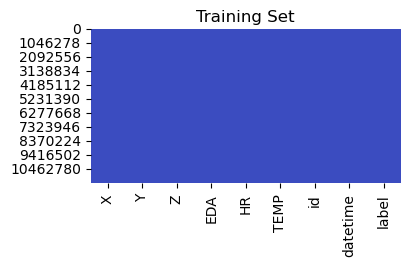

In [83]:
#Plot missing data using heatmap
plt.figure(figsize=(4, 2))
plt.title("Training Set")
sns.heatmap(data.isnull(), cbar=False, cmap="coolwarm")
plt.show()

In [84]:
data= data.drop(columns=['id'],axis=1)
data

,X,Y,Z,EDA,HR,TEMP,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,2020-07-08 14:03:00.124999936,2.0
...,...,...,...,...,...,...,...,...
11509046,-16.0,-56.0,24.0,3.386070,88.37,33.77,2020-07-23 17:28:59.875000064,2.0
11509047,-8.0,-50.0,27.0,3.386070,88.37,33.77,2020-07-23 17:28:59.906249984,2.0
11509048,-28.0,-36.0,28.0,3.386070,88.37,33.77,2020-07-23 17:28:59.937499904,2.0
11509049,-29.0,-29.0,30.0,3.386070,88.37,33.77,2020-07-23 17:28:59.968750080,2.0


In [85]:
#feature extraction from a datetime column
data['datetime'] = pd.to_datetime(data['datetime'])

# Extract useful features from the datetime
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour

data.head()

,X,Y,Z,EDA,HR,TEMP,datetime,label,year,month,day,hour
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,2020-07-08 14:03:00.000000000,2.0,2020,7,8,14
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,2020-07-08 14:03:00.031249920,2.0,2020,7,8,14
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,2020-07-08 14:03:00.062500096,2.0,2020,7,8,14
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,2020-07-08 14:03:00.093750016,2.0,2020,7,8,14
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,2020-07-08 14:03:00.124999936,2.0,2020,7,8,14


In [86]:
#convert datetime to numeric_variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['datetime_encoded'] = le.fit_transform(data['datetime'].astype(str))  # Convert datetime to string first
data.head()

,X,Y,Z,EDA,HR,TEMP,datetime,label,year,month,day,hour,datetime_encoded
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,2020-07-08 14:03:00.000000000,2.0,2020,7,8,14,5330929
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,2020-07-08 14:03:00.031249920,2.0,2020,7,8,14,5330930
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,2020-07-08 14:03:00.062500096,2.0,2020,7,8,14,5330931
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,2020-07-08 14:03:00.093750016,2.0,2020,7,8,14,5330932
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,2020-07-08 14:03:00.124999936,2.0,2020,7,8,14,5330933


In [87]:
#calculates and prints the skewness and kurtosis
columns = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'datetime_encoded']

for col in columns:
    print(f"{col}")
    print(f"Skewness: {data[col].skew():.6f}")
    print(f"Kurtosis: {data[col].kurt():.6f}")
    print("-" * 30)

X
Skewness: 0.966240
Kurtosis: 0.848937
------------------------------
Y
Skewness: -0.206264
Kurtosis: -0.067435
------------------------------
Z
Skewness: -0.349053
Kurtosis: 0.254031
------------------------------
EDA
Skewness: 3.026141
Kurtosis: 12.169553
------------------------------
HR
Skewness: 0.927843
Kurtosis: 2.327563
------------------------------
TEMP
Skewness: -0.282816
Kurtosis: -1.088713
------------------------------
datetime_encoded
Skewness: 0.078673
Kurtosis: -1.183099
------------------------------


KeyError: 'datetime_encoded'

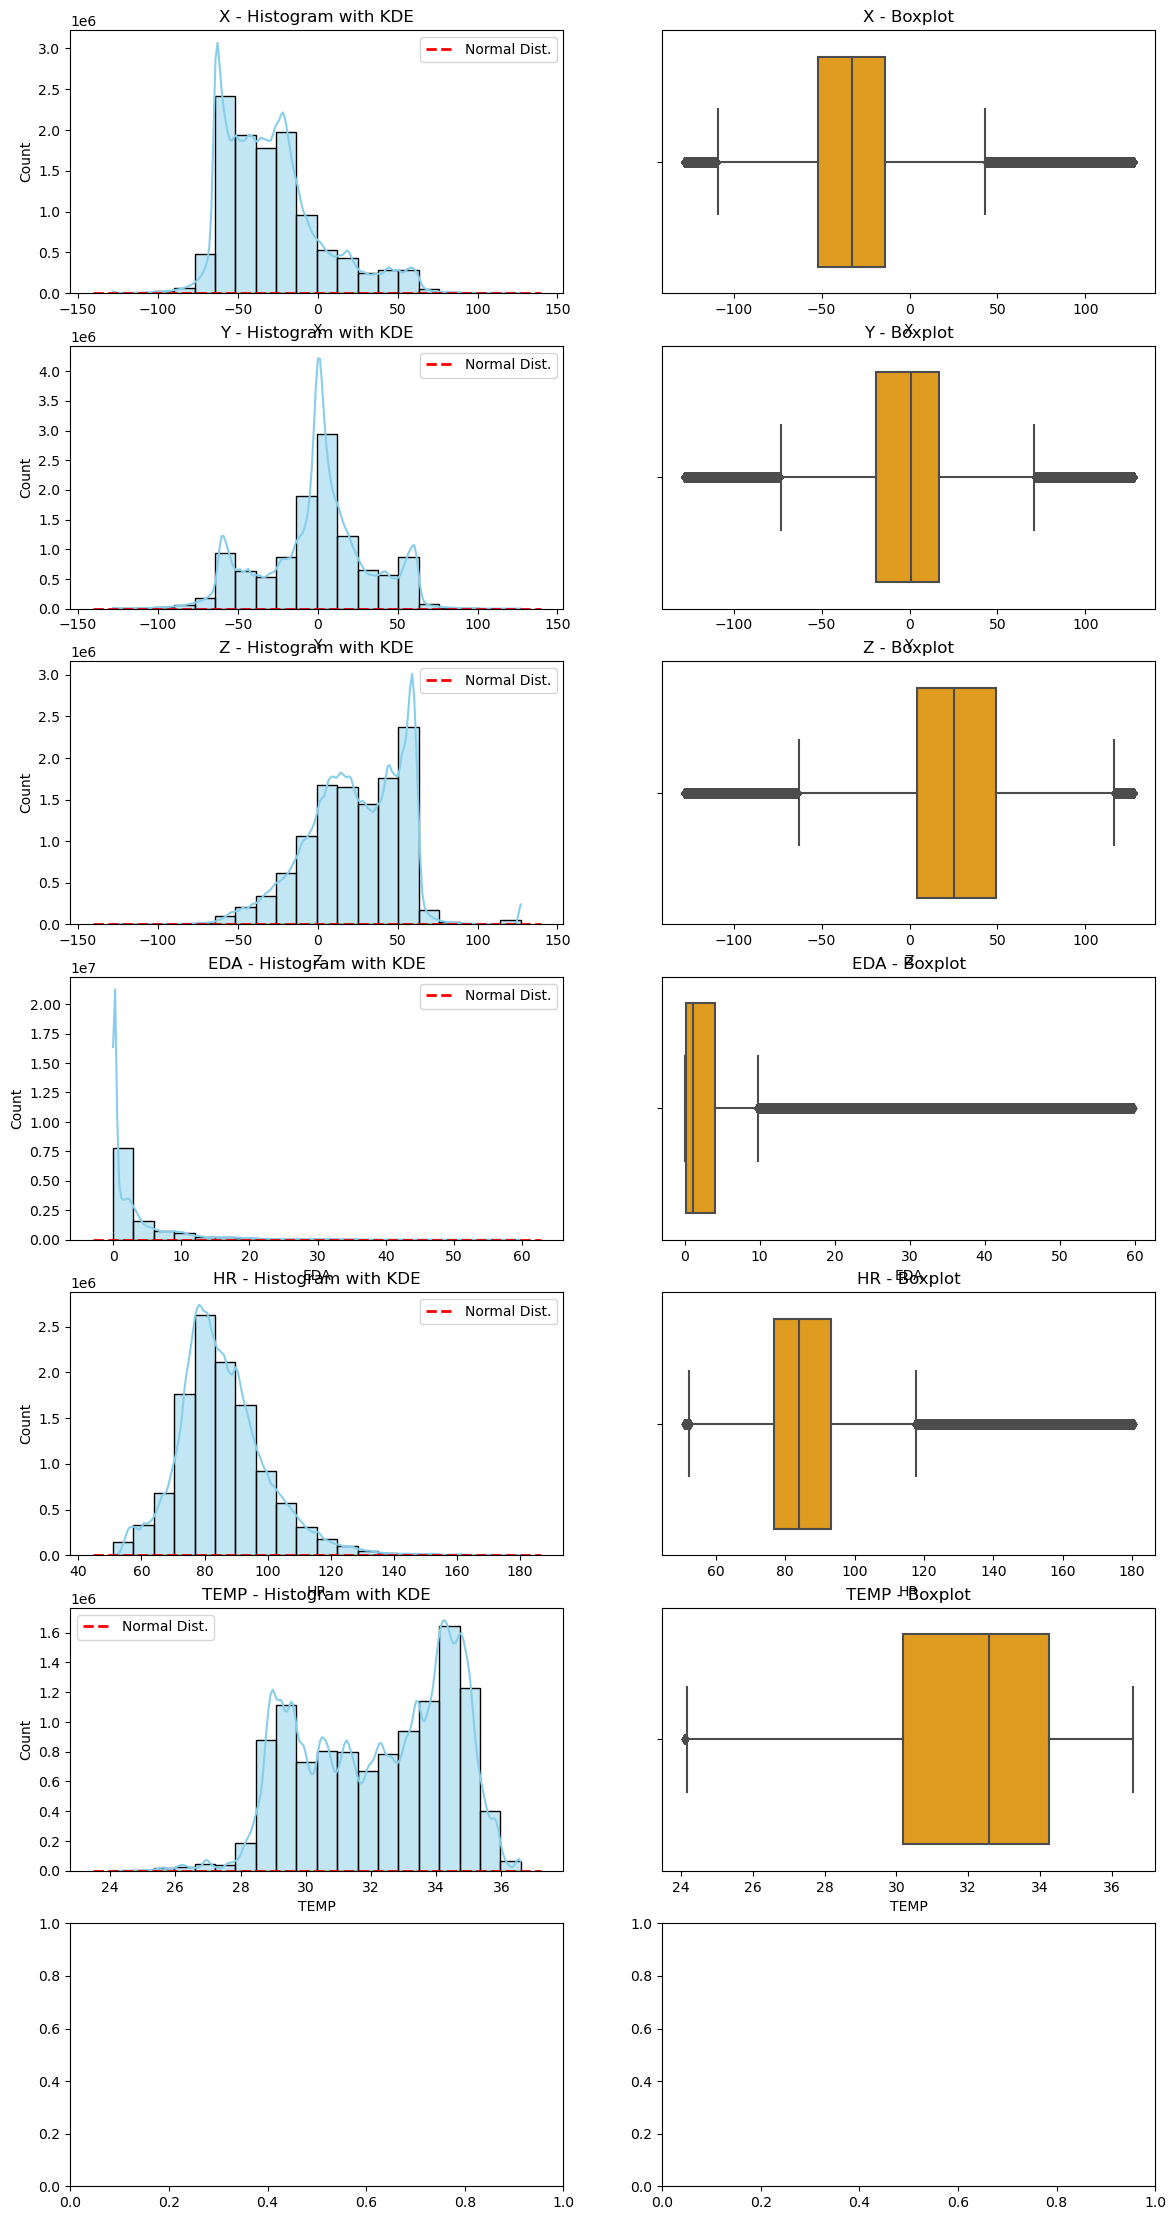

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# List of columns you want to visualize
columns = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'datetime_encoded']

# Create subplots - 2 rows (Histogram and Boxplot) for each feature
fig, axes = plt.subplots(len(columns), 2, figsize=(14, len(columns) * 4))

# Loop through each column
for i, col in enumerate(columns):
    # Plot histogram with KDE for skewness
    sns.histplot(data[col], kde=True, color='skyblue', ax=axes[i, 0], bins=20)
    axes[i, 0].set_title(f'{col} - Histogram with KDE', fontsize=12)
    axes[i, 0].set_xlabel(f'{col}')
    
    # Overlay a normal distribution
    mean, std = data[col].mean(), data[col].std()
    xmin, xmax = axes[i, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    axes[i, 0].plot(x, p, 'r--', label='Normal Dist.', lw=2)
    axes[i, 0].legend()

    # Plot boxplot for visualizing kurtosis
    sns.boxplot(x=data[col], ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'{col} - Boxplot', fontsize=12)
    axes[i, 1].set_xlabel(f'{col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
data.head()

In [ ]:
#calculating the skewness and kurtosis before and after applying a transformation to the 'EDA' column. 
#using cube root transformation (train['EDA'] = train['EDA']**(1/3)) to reduce skewness
import scipy.stats as stats

# Original EDA skewness and kurtosis
print("EDA Original value")
print("Skewness: %f" % data['EDA'].skew())
print("Kurtosis: %f" % data['EDA'].kurt())

# Apply cube root transformation to EDA to reduce skewness
print("\nEDA Adjusted value (Cube Root Transformation)")
data['EDA'] = data['EDA']**(1/3)
print('Skewness: %f' % stats.skew(data['EDA'], bias=False))
print('Kurtosis: %f' % stats.kurtosis(data['EDA'], bias=False, fisher=True))

#Positive skewness: Indicates a right-skewed distribution (long tail on the right).
#Negative skewness: Indicates a left-skewed distribution (long tail on the left).
#Kurtosis: Values near 0 (when fisher=True) indicate a normal-like distribution; 
#positive values mean a more peaked distribution, while negative values indicate a flatter distribution.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the original and transformed EDA distribution side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original EDA distribution
sns.histplot(data['EDA']**3, kde=True, color='skyblue', ax=axes[0], bins=20)
axes[0].set_title('Original EDA Distribution')
axes[0].set_xlabel('EDA (Original)')
axes[0].set_ylabel('Frequency')

# Transformed EDA distribution (Cube Root)
sns.histplot(data['EDA'], kde=True, color='orange', ax=axes[1], bins=20)
axes[1].set_title('Transformed EDA (Cube Root)')
axes[1].set_xlabel('EDA (Transformed)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#Left Plot: The first subplot shows the distribution of the original EDA values.
#Right Plot: The second subplot shows the distribution after applying the cube root transformation.
#KDE Overlay: Kernel Density Estimation (KDE) is added to smooth the histogram and help visualize the overall shape of the distribution.